In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score


In [4]:
train_df = pd.read_csv("twitter_training.csv")
val_df = pd.read_csv("twitter_validation.csv")
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
train_df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [27]:
train_df = train_df.iloc[:, :4]
val_df = val_df.iloc[:, :4]

train_df.columns = ['id', 'entity', 'sentiment', 'text']
val_df.columns = ['id', 'entity', 'sentiment', 'text']



In [28]:
train_df.isnull().sum()
train_df.duplicated().sum()


np.int64(0)

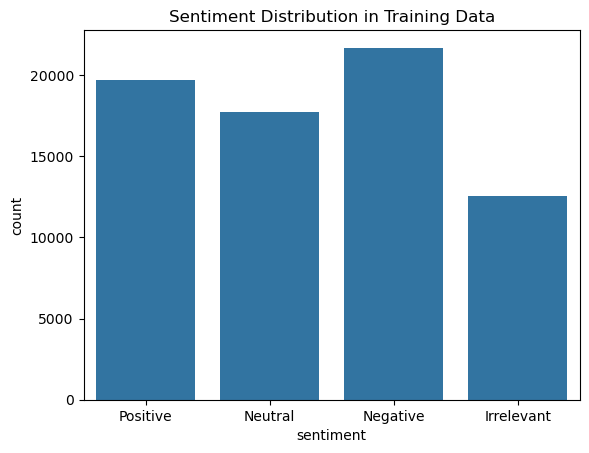

In [29]:
plt.figure()
sns.countplot(data=train_df, x='sentiment')
plt.title("Sentiment Distribution in Training Data")
plt.show()


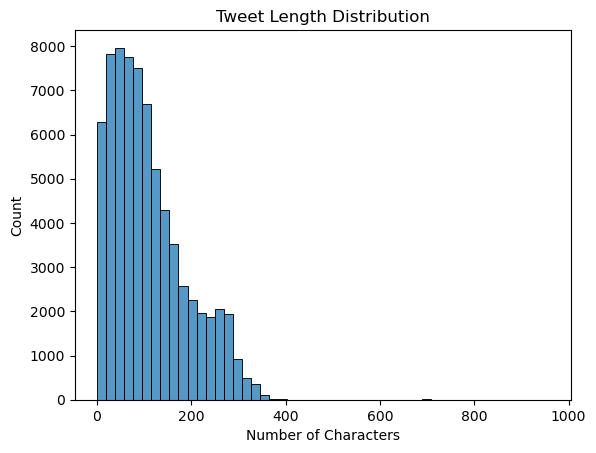

In [30]:
train_df['text_length'] = train_df['text'].apply(len)

plt.figure()
sns.histplot(train_df['text_length'], bins=50)
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Characters")
plt.show()


In [31]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)       # remove URLs
    text = re.sub(r"@\w+", "", text)           # remove mentions
    text = re.sub(r"#\w+", "", text)           # remove hashtags
    text = re.sub(r"\d+", "", text)            # remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.strip()
    return text


In [32]:
train_df['clean_text'] = train_df['text'].apply(clean_text)
val_df['clean_text'] = val_df['text'].apply(clean_text)

train_df[['text', 'clean_text']].head()


,text,clean_text
0,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...
4,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [33]:
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X_train = tfidf.fit_transform(train_df['clean_text'])
X_val = tfidf.transform(val_df['clean_text'])

y_train = train_df['sentiment']
y_val = val_df['sentiment']


In [34]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_val)

print("Naive Bayes Accuracy:", accuracy_score(y_val, y_pred_nb))
print(classification_report(y_val, y_pred_nb))


Naive Bayes Accuracy: 0.7067067067067067
              precision    recall  f1-score   support

  Irrelevant       0.78      0.53      0.63       171
    Negative       0.65      0.86      0.74       266
     Neutral       0.80      0.56      0.66       285
    Positive       0.69      0.83      0.75       277

    accuracy                           0.71       999
   macro avg       0.73      0.69      0.69       999
weighted avg       0.73      0.71      0.70       999



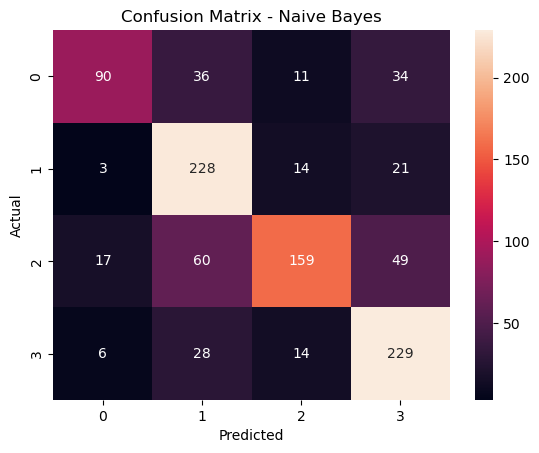

In [35]:
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
lr_model = LogisticRegression(
    max_iter=1000,
    C=1.0,
    solver='lbfgs',
    multi_class='auto'
)

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))


C:\Users\abay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.7967967967967968
              precision    recall  f1-score   support

  Irrelevant       0.76      0.67      0.71       171
    Negative       0.74      0.88      0.80       266
     Neutral       0.86      0.74      0.79       285
    Positive       0.83      0.86      0.84       277

    accuracy                           0.80       999
   macro avg       0.80      0.79      0.79       999
weighted avg       0.80      0.80      0.80       999



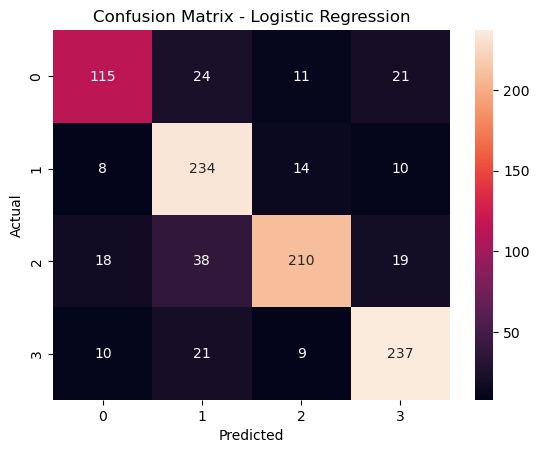

In [37]:
cm_lr = confusion_matrix(y_val, y_pred_lr)

plt.figure()
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [38]:
results = pd.DataFrame({
    "Model": ["Naive Bayes (Baseline)", "Logistic Regression (Improved)"],
    "Accuracy": [
        accuracy_score(y_val, y_pred_nb),
        accuracy_score(y_val, y_pred_lr)
    ],
    "Macro F1-score": [
        f1_score(y_val, y_pred_nb, average='macro'),
        f1_score(y_val, y_pred_lr, average='macro')
    ]
})

results


,Model,Accuracy,Macro F1-score
0,Naive Bayes (Baseline),0.706707,0.693562
1,Logistic Regression (Improved),0.796797,0.787852
